# Problem Statement
The aim of this project is to determine the set of explanatory variables that most significantly affect murder rates in US states.

# Data
The data consists of 50 records for 50 US states. There are 17 features in the data which are described below:<br>

STATE: Name of the US State<br>
VIOCRIM06: Violent Crimes per 100K Persons, 2006<br>
MURDER06: Murders per 100K Persons, 2006<br>
POP1864_06: Adult Population (ages 18-64) in 2006<br>
COPS06: Public Law Enforcement Officers, 2006<br>
INPRISON06: Incarcerated Population, 2006<br>
DEATHPNLTY: 1 if State has Death Penalty; 0 Otherwise<br>
DEATHROW06: Prisoners on Death Row, 2006<br>
EXECUTED: Number of Executions between 1976 and 2006<br>
PCTINCARC06: Percent of Adult Population Incarcerated, 2006<br>
PCTHSGRAD: Percent of Adult Population with High School Diploma or equivalent<br>
UNEMPL06: Statewide Unemployment Rate, 2006<br>
MEDHHINC: Median Household Income, 2006<br>
<200%POV: Percent of Population Below 200% of Poverty Level, 2006<br>
<100%POV: Percent of Population Below 100% of Poverty Level, 2006<br>
<50%POV: Percent of Population Below 50% of Poverty Level, 2006<br>
GINI06: Gini Coefficient of Household Income Inequality, 2006<br>

We'll estimate a series of multivariate linear regression models to determine the explanatory variables.<br>

# Agenda
* Data Loading and Understanding
* Exploratory Data Analysis
* Modeling
    * Feature Selection: Backward Elimination
    * Multicollinearity: Variance Inflation Factor
* Linear Regression Assumptions Validation
    1. Linearity
    2. Zero Mean of Residuals
    3. Homoscedasticity
    4. Normality of Error Terms or Residuals
    5. No Autocorrelation
    6. No Perfect Multicollinearity
* Conclusion    

# Importing Necessary Libraries

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Statistics
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Loading and Understanding

In [2]:
# Loading the data
df = pd.read_csv('crime_rate_by_state.csv')
print(f'Shape of the data: {df.shape}')
df.head()

Shape of the data: (50, 17)


,STATE,VIOCRIM06,MURDER06,POP1864_06,COPS06,INPRISON06,DEATHPNLTY,DEATHROW06,EXECUTED,PCTINCARC06,PCTHSGRAD,UNEMPL06,MEDHHINC,<200%POV,<100%POV,<50%POV,GINI06
0,Alabama,425.2,8.3,2853884.0,15697.0,28241.0,1,195,35,0.009896,0.804,3.5,38783.0,0.38,0.17,0.07,0.472
1,Alaska,688.0,5.4,448794.0,1937.0,5069.0,0,0,0,0.011295,0.905,6.5,59393.0,0.26,0.11,0.05,0.417
2,Arizona,501.4,7.5,3740710.0,21434.0,35892.0,1,124,22,0.009595,0.835,4.1,47265.0,0.34,0.14,0.06,0.454
3,Arkansas,551.6,7.3,1718877.0,8266.0,13729.0,1,37,27,0.007987,0.811,5.3,36599.0,0.40,0.17,0.07,0.460
4,California,532.5,6.8,22934042.0,115912.0,175512.0,1,660,13,0.007653,0.802,4.9,56645.0,0.32,0.13,0.05,0.466


The data consists of 50 rows (representing 50 states of United States) and 17 columns (relevant features for our analysis).

In [3]:
# Duplicates check
df.duplicated().sum()

0

To avoid bias in our final results, we check for duplicates. There are no duplicate records found in our data.

In [4]:
# Data types check
df.dtypes

STATE           object
VIOCRIM06      float64
MURDER06       float64
POP1864_06     float64
COPS06         float64
INPRISON06     float64
DEATHPNLTY       int64
DEATHROW06       int64
EXECUTED         int64
PCTINCARC06    float64
PCTHSGRAD      float64
UNEMPL06       float64
MEDHHINC       float64
<200%POV       float64
<100%POV       float64
<50%POV        float64
GINI06         float64
dtype: object

Data type and format of each feature is appropriate. Therefore, there is no formatting needed.

In [5]:
# Numerical data description
df.select_dtypes(include=np.number).describe()

,VIOCRIM06,MURDER06,POP1864_06,COPS06,INPRISON06,DEATHPNLTY,DEATHROW06,EXECUTED,PCTINCARC06,PCTHSGRAD,UNEMPL06,MEDHHINC,<200%POV,<100%POV,<50%POV,GINI06
count,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,409.984000,4.770000,3.748303e+06,19644.900000,27551.960000,0.720000,66.080000,21.080000,0.007041,0.860060,4.400000,47841.600000,0.308400,0.129200,0.055800,0.446900
std,183.967438,2.576523,4.169587e+06,23780.959009,35534.623188,0.453557,125.133698,56.406629,0.002677,0.036629,1.003667,7764.323567,0.059087,0.030562,0.011622,0.019455
min,115.500000,1.000000,3.281100e+05,1567.000000,1363.000000,0.000000,0.000000,0.000000,0.002526,0.785000,2.500000,34473.000000,0.200000,0.080000,0.040000,0.410000
25%,280.425000,2.525000,1.098686e+06,4338.750000,6482.250000,0.000000,0.250000,0.000000,0.005245,0.830000,3.550000,42666.500000,0.270000,0.110000,0.050000,0.432250
50%,371.600000,4.850000,2.690972e+06,12090.000000,20283.000000,1.000000,10.000000,2.500000,0.006684,0.870500,4.500000,46244.500000,0.305000,0.130000,0.050000,0.448000
75%,539.325000,6.375000,4.127652e+06,22512.500000,34460.750000,1.000000,76.750000,20.750000,0.008287,0.890750,4.900000,52441.000000,0.350000,0.147500,0.060000,0.460750
max,765.500000,12.400000,2.293404e+07,115912.000000,175512.000000,1.000000,660.000000,379.000000,0.013620,0.912000,6.900000,65144.000000,0.440000,0.210000,0.090000,0.495000


All the features can be observed to have data in a reasonable range. Hence, there are no corrections needed.

In [6]:
# Missing values check
df.isnull().sum()

STATE          0
VIOCRIM06      0
MURDER06       0
POP1864_06     0
COPS06         0
INPRISON06     0
DEATHPNLTY     0
DEATHROW06     0
EXECUTED       0
PCTINCARC06    0
PCTHSGRAD      0
UNEMPL06       0
MEDHHINC       0
<200%POV       0
<100%POV       0
<50%POV        0
GINI06         0
dtype: int64

There are no missing values in our dataset.

# Exploratory Data Analysis

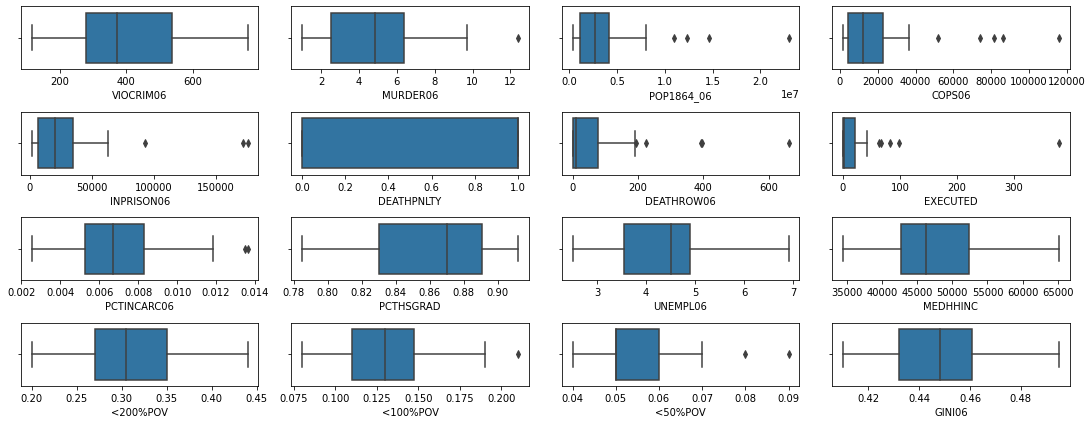

In [7]:
# Outliers check: univariate distribution
df_eda = df.drop(columns='STATE')

plt.figure(figsize=(15, 6))
i = 0
for col in df_eda.columns:
    i += 1
    plt.subplot(4, 4, i)
    sns.boxplot(df_eda[col])

plt.tight_layout()
plt.show()

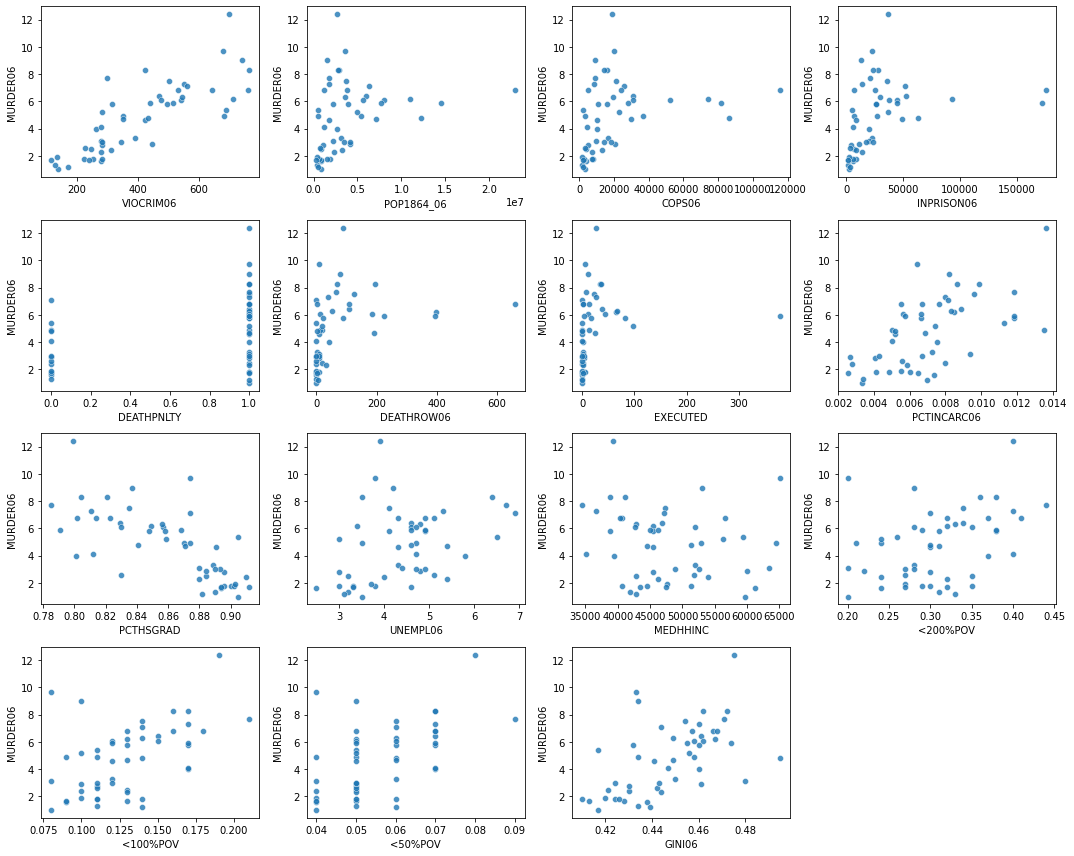

In [8]:
# Outliers check: bivariate distribution
plt.figure(figsize=(15, 12))
i = 0
for col in df_eda.columns:
    if col!='MURDER06':
        i += 1
        plt.subplot(4, 4, i)
        sns.scatterplot(x=df_eda[col], y=df_eda['MURDER06'], alpha=0.8)

plt.tight_layout()
plt.show()

Based on above univariate and bivariate distribution of features, outliers are identified as follows:
* POP1864_06>20000000
* COPS06>60000
* INPRISON06>150000
* DEATHROW06>300
* EXECUTED>300

In [9]:
# Outliers removal
df_cleaned = df_eda.drop(df_eda[(df_eda.POP1864_06>20000000)|(df_eda.COPS06>60000)|
                                (df_eda.INPRISON06>150000)|(df_eda.DEATHROW06>300)|
                                (df_eda.EXECUTED>300)].index)
df_cleaned.shape

(46, 16)

We removed 4 records which were identified as outliers.

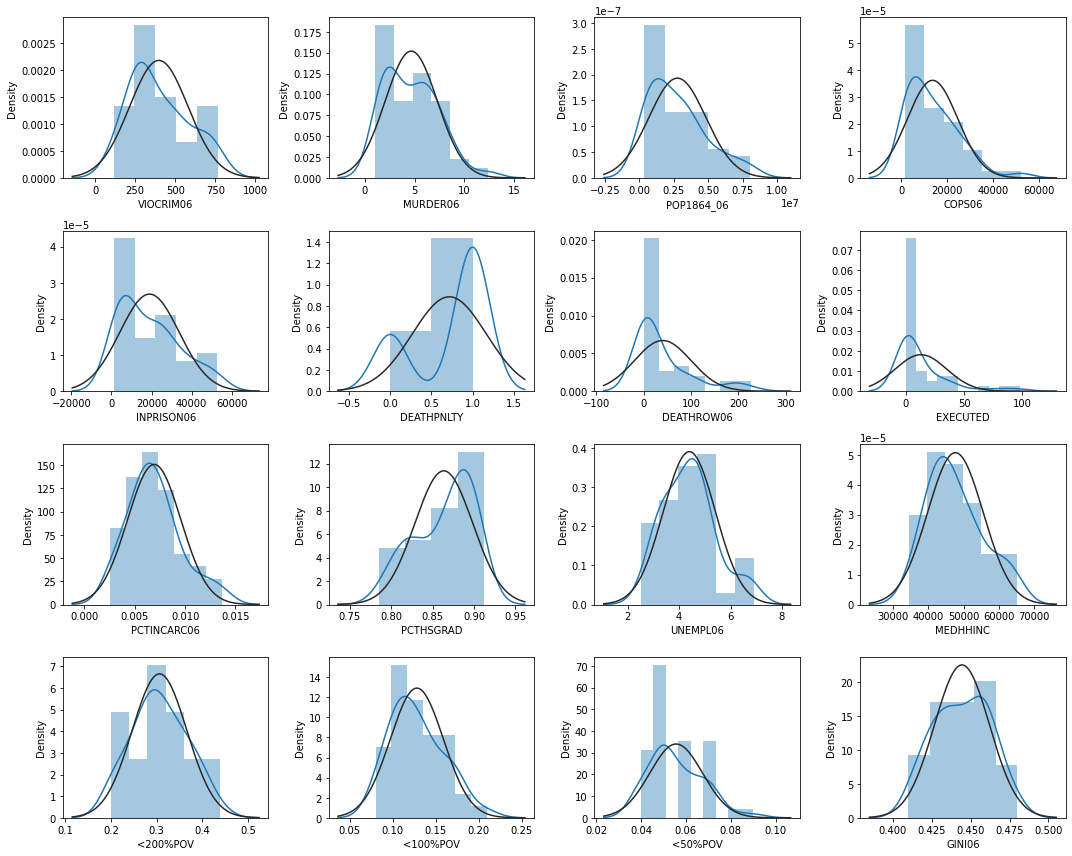

In [10]:
# Distribution of variables
plt.figure(figsize=(15, 12))
i = 0
for col in df_cleaned.columns:
    i += 1
    plt.subplot(4, 4, i)
    sns.distplot(df_cleaned[col], fit=norm)

plt.tight_layout()
plt.show()

Some features can be seen to have considerable skewness. let us check the skewness.

In [11]:
# Skewness check
skewness = df_cleaned.skew()
skewed = skewness[skewness>0.7]
skewed

POP1864_06    0.909161
COPS06        1.221121
INPRISON06    0.718602
DEATHROW06    1.771391
EXECUTED      2.354098
dtype: float64

We are applying log-transformation to highly skewed (skewness>0.7) features to reduce their skewness.

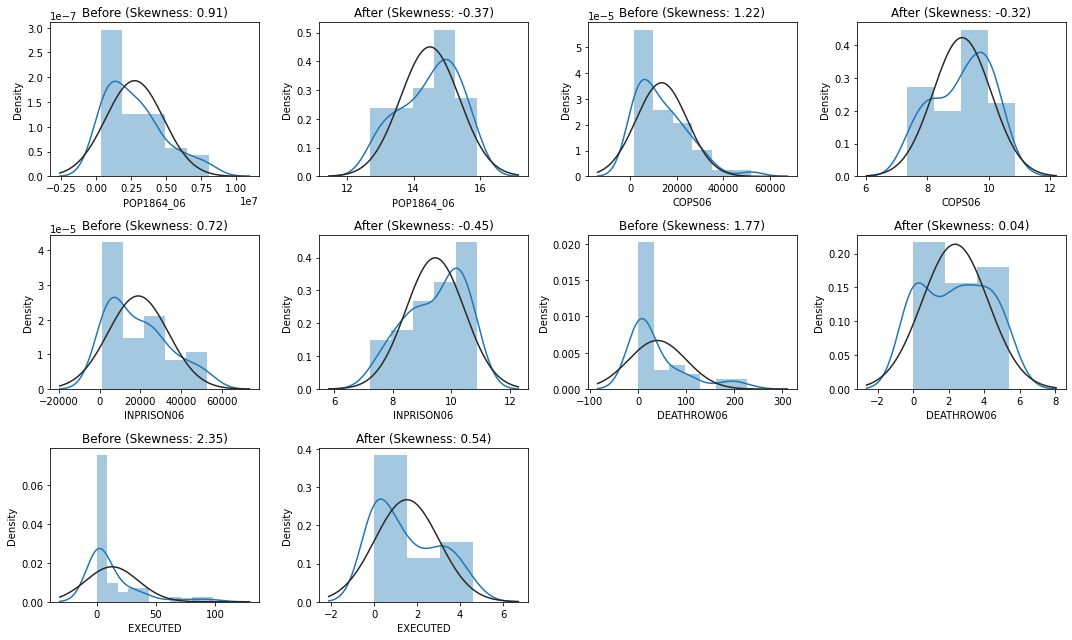

In [12]:
# Applying log-transformation to the skewed features
df_tfm = df_cleaned.copy()

for col in skewed.index:
    df_tfm[col] = np.log1p(df_tfm[col]) 

# New skewness check
skewness2 = df_tfm.skew()

# Skewness comparison plot
plt.figure(figsize=(15, 9))
i = 0
for col in skewed.index:
    # Before transformation plot
    i += 1
    plt.subplot(3, 4, i)
    sns.distplot(df_cleaned[col], fit=norm)
    plt.title(f'Before (Skewness: {round(skewed[col], 2)})')
    
    # After transformation plot
    i += 1
    plt.subplot(3, 4, i)
    sns.distplot(df_tfm[col], fit=norm)
    plt.title(f'After (Skewness: {round(skewness2[col], 2)})')
    
plt.tight_layout()
plt.show()

As visible in the above before-after comparison plots, we were able to deal with the highly skewed features by applying log-transformation.

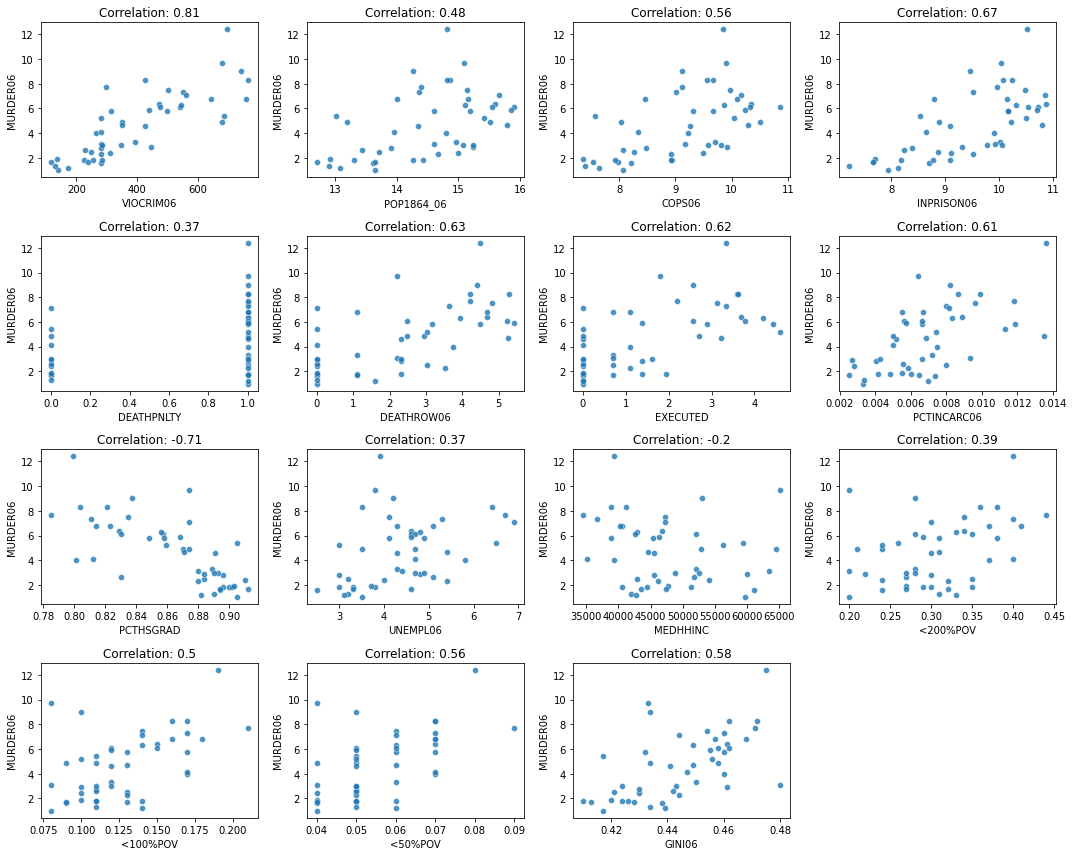

In [13]:
# Understanding relationship of each independent variable with the dependent variable
corr_s = df_tfm.corr()['MURDER06']
plt.figure(figsize=(15, 12))
i = 0
for col in df_tfm.columns:
    if col!='MURDER06':
        i += 1
        plt.subplot(4, 4, i)
        sns.scatterplot(x=df_tfm[col], y=df_tfm['MURDER06'], alpha=0.8)
        plt.title(f'Correlation: {round(corr_s[col], 2)}')

plt.tight_layout()
plt.show()

VIOCRIM06 has the highest positive correlation (0.81), and PCTHSGRAD has the highest negative correlation (-0.71) with the dependent variable MURDER06. In addition, other features such as INPRISON06, DEATHROW06, EXECUTED, and PCTINCARC06 also show a strong correlation with the dependent variable.

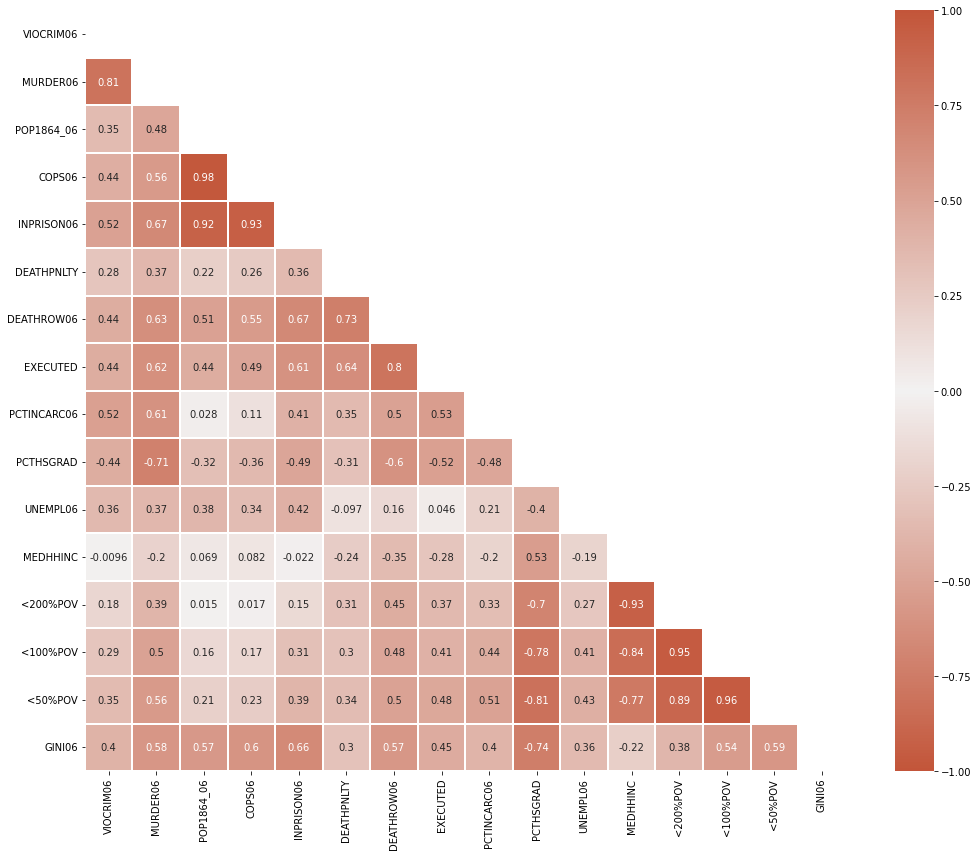

In [14]:
# Multicollinearity check using Heatmap
plt.figure(figsize=(15, 12))
corr_df = df_tfm.corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
cmap = sns.diverging_palette(20, 20, as_cmap=True)
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmin=-1, vmax=1, 
            center=0, annot=True, linewidth=0.05, square=True)
plt.tight_layout()
plt.show()

Based on above heatmap, we will remove the following variables to avoid multicollinearity:<br>
'POP1864_06', 'COPS06', 'MEDHHINC', '<200%POV', and '<100%POV'

# Modeling

In [15]:
# Dividing data into dependent and independent variables
X = df_tfm.drop(columns=['MURDER06', 'POP1864_06', 'COPS06', 
                         'MEDHHINC', '<200%POV', '<100%POV'])
y = df_tfm['MURDER06']

# Modeling
result = sm.OLS(y, sm.add_constant(X)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MURDER06   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     21.57
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           4.09e-12
Time:                        16:21:19   Log-Likelihood:                -64.410
No. Observations:                  46   AIC:                             150.8
Df Residuals:                      35   BIC:                             170.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          34.5518     14.335      2.410      

## Feature Selection: Backward Elimination
The p-value in the above summary is associated with a hypothesis test; this test checks the importance of each variable in prediction in the presence of other variables. A p-value less than 0.05 denotes that the feature adds significant value in predicting the outcome variable. On the other hand, if the p-value is greater than 0.05, it is insignificant for prediction in the presence of the other variables.<br>
Based on the p-value, let us remove the most insignificant variable, i.e., DEATHROW06.

In [16]:
X = df_tfm.drop(columns=['MURDER06', 'POP1864_06', 'COPS06', 'MEDHHINC', 
                         '<200%POV', '<100%POV', 'DEATHROW06'])

# Modeling
result = sm.OLS(y, sm.add_constant(X)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MURDER06   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     24.65
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           7.93e-13
Time:                        16:21:19   Log-Likelihood:                -64.413
No. Observations:                  46   AIC:                             148.8
Df Residuals:                      36   BIC:                             167.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          34.4221     13.964      2.465      

The most insignificant variable among the existing variables is <50%POV. Let us remove it in the next iteration

In [17]:
X = df_tfm.drop(columns=['MURDER06', 'POP1864_06', 'COPS06', 'MEDHHINC', 
                         '<200%POV', '<100%POV', 'DEATHROW06', '<50%POV'])

# Modeling
result = sm.OLS(y, sm.add_constant(X)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MURDER06   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     28.39
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           1.51e-13
Time:                        16:21:19   Log-Likelihood:                -64.486
No. Observations:                  46   AIC:                             147.0
Df Residuals:                      37   BIC:                             163.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          32.1604     12.112      2.655      

Next insignificant variable is DEATHPNLTY.

In [18]:
X = df_tfm.drop(columns=['MURDER06', 'POP1864_06', 'COPS06', 'MEDHHINC', '<200%POV', 
                         '<100%POV', 'DEATHROW06', '<50%POV', 'DEATHPNLTY'])

# Modeling
result = sm.OLS(y, sm.add_constant(X)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MURDER06   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     33.11
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           2.76e-14
Time:                        16:21:19   Log-Likelihood:                -64.613
No. Observations:                  46   AIC:                             145.2
Df Residuals:                      38   BIC:                             159.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          32.2707     11.983      2.693      

Let us remove EXECUTED feature due to its high p-value indicating high insignificance.

In [19]:
X = df_tfm.drop(columns=['MURDER06', 'POP1864_06', 'COPS06', 'MEDHHINC', '<200%POV', 
                         '<100%POV', 'DEATHROW06', '<50%POV', 'DEATHPNLTY', 'EXECUTED'])

# Modeling
result = sm.OLS(y, sm.add_constant(X)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MURDER06   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     39.47
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           4.49e-15
Time:                        16:21:19   Log-Likelihood:                -64.705
No. Observations:                  46   AIC:                             143.4
Df Residuals:                      39   BIC:                             156.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          33.4189     11.485      2.910      

Next insignificant variable is PCTINCARC06.

In [20]:
X = df_tfm.drop(columns=['MURDER06', 'POP1864_06', 'COPS06', 'MEDHHINC', 
                         '<200%POV', '<100%POV', 'DEATHROW06', '<50%POV', 
                         'DEATHPNLTY', 'EXECUTED', 'PCTINCARC06'])

# Modeling
result = sm.OLS(y, sm.add_constant(X)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MURDER06   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     46.91
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           1.09e-15
Time:                        16:21:19   Log-Likelihood:                -65.391
No. Observations:                  46   AIC:                             142.8
Df Residuals:                      40   BIC:                             153.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6420     11.328      3.146      0.0

Due to a high p-value, let us remove column UNEMPL06.

In [21]:
X = df_tfm.drop(columns=['MURDER06', 'POP1864_06', 'COPS06', 'MEDHHINC', 
                         '<200%POV', '<100%POV', 'DEATHROW06', '<50%POV', 
                         'DEATHPNLTY', 'EXECUTED', 'PCTINCARC06', 'UNEMPL06'])

# Modeling
result = sm.OLS(y, sm.add_constant(X)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MURDER06   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     57.48
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           2.84e-16
Time:                        16:21:20   Log-Likelihood:                -66.266
No. Observations:                  46   AIC:                             142.5
Df Residuals:                      41   BIC:                             151.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4860     11.269      2.971      0.0

Next insignificant variable is GINI06.

In [22]:
X = df_tfm.drop(columns=['MURDER06', 'POP1864_06', 'COPS06', 'MEDHHINC', '<200%POV', 
                         '<100%POV', 'DEATHROW06', '<50%POV', 'DEATHPNLTY', 
                         'EXECUTED', 'PCTINCARC06', 'UNEMPL06', 'GINI06'])

# Modeling
result = sm.OLS(y, sm.add_constant(X)).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MURDER06   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     74.65
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           7.13e-17
Time:                        16:21:20   Log-Likelihood:                -67.244
No. Observations:                  46   AIC:                             142.5
Df Residuals:                      42   BIC:                             149.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4479      5.672      3.605      0.0

Since all the features have p-values less than 0.05, we can say they are all significant in predicting the dependent variable. For multicollinearity, let us check the Variance Inflation Factor (VIF) of this remaining set of variables.
## Multicollinearity: Variance Inflation Factor
A feature with a VIF of more than 10 is usually removed to avoid multicollinearity. A higher VIF value tells that the feature can be predicted by the remaining features.

In [23]:
# Variance Inflation Factor (VIF)
vif = pd.Series([round(variance_inflation_factor(X.values, i), 2) for i in range(X.shape[1])],
                 index = X.columns)
vif.sort_values(ascending=False)

INPRISON06    91.72
PCTHSGRAD     68.80
VIOCRIM06      8.17
dtype: float64

Since INPRISON06 column has the highest VIF which is beyond 10, we will drop it to avoid multicollinearity.

In [24]:
X = df_tfm.drop(columns=['MURDER06', 'POP1864_06', 'COPS06', 'MEDHHINC', '<200%POV', 
                         '<100%POV', 'DEATHROW06', '<50%POV', 'DEATHPNLTY', 'EXECUTED', 
                         'PCTINCARC06', 'UNEMPL06', 'GINI06', 'INPRISON06'])

# Modeling
result = sm.OLS(y, sm.add_constant(X)).fit()
print(result.summary())

# Variance Inflation Factor (VIF)
vif = pd.Series([round(variance_inflation_factor(X.values, i), 2) for i in range(X.shape[1])],
                 index = X.columns)
print(f'\nVariance Inflation Factor (VIF):\n{vif.sort_values(ascending=False)}')

                            OLS Regression Results                            
Dep. Variable:               MURDER06   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     93.47
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           2.21e-16
Time:                        16:21:20   Log-Likelihood:                -71.132
No. Observations:                  46   AIC:                             148.3
Df Residuals:                      43   BIC:                             153.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6194      4.963      5.968      0.0

As all the features have p-values less than 0.05 and VIFs less than 10, we will consider this as our final model. let us validate our final model for the linear regression assumptions before concluding.

# Linear Regression Assumptions Validation
### 1. Linearity

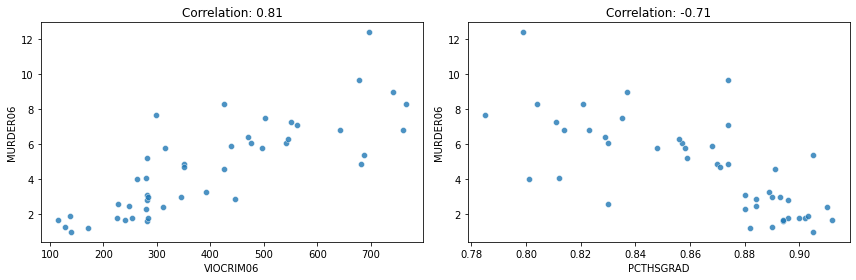

Harvey Collier Test of Linearity: P-value=0.55


In [25]:
# Graphical method
corr_s = df_tfm.corr()['MURDER06']
plt.figure(figsize=(12, 4))
for i, col in zip([1, 2], ['VIOCRIM06', 'PCTHSGRAD']):
    plt.subplot(1, 2, i)
    sns.scatterplot(x=df_tfm[col], y=df_tfm['MURDER06'], alpha=0.8)
    plt.title(f'Correlation: {round(corr_s[col], 2)}')
plt.tight_layout()
plt.show()

# Harvey Collier Test
import statsmodels.stats.api as sms
_, p_val = sms.linear_harvey_collier(result)
print(f'Harvey Collier Test of Linearity: P-value={round(p_val, 2)}')

As we can notice, final set of independent variables show a linear relationship with the dependent variable in the plots and p-value for the Harvey Collier Test is also greater than 0.05 which satisfies our assumption of Linearity.

### 2. Zero Mean of Residuals

In [26]:
# Mean of residuals
y_pred = 0.0089*df_tfm['VIOCRIM06']-32.9743*df_tfm['PCTHSGRAD']+29.6194
y = df_tfm['MURDER06']
residuals = y-y_pred
mean_residuals = np.mean(residuals)
print(f'Mean of Residuals = {mean_residuals}')

Mean of Residuals = -0.01857291304347723


The mean of residuals is very close to zero which supports our assumption.

### 3. Homoscedasticity

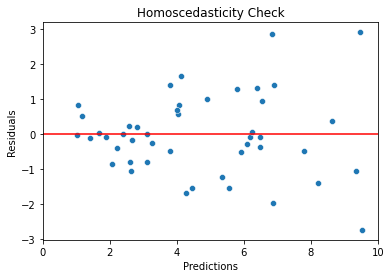

Breusch-Pagan Test: P-value=0.0


In [27]:
# Graphical Method
sns.scatterplot(y_pred, residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.xlim([0, 10])
plt.plot([0, 10], [0, 0], color='red')
plt.show()

# Breusch-Pagan Test
x, p_val, _, _ = het_breuschpagan(residuals, df_tfm[['VIOCRIM06', 'PCTHSGRAD']])
print(f'Breusch-Pagan Test: P-value={round(p_val, 2)}')

As we can see, the plot shows an increasing pattern in data points from left to right in a shape of cone and Breusch-Pagan Test has also resulted in a p-value less than 0.05 which indicates existence of Heteroscedasticity.

Let us use Robust Standard Error to deal with the heteroscedasticity.

In [28]:
# Incorporating Robust Standard Error
X = df_tfm[['VIOCRIM06', 'PCTHSGRAD']]
result = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC3')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MURDER06   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     50.27
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           5.56e-12
Time:                        16:21:21   Log-Likelihood:                -71.132
No. Observations:                  46   AIC:                             148.3
Df Residuals:                      43   BIC:                             153.8
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6194      6.600      4.488      0.0

We can observe that the values of standard error have increased for each predictor.

### 4. Normality of Error Terms or Residuals

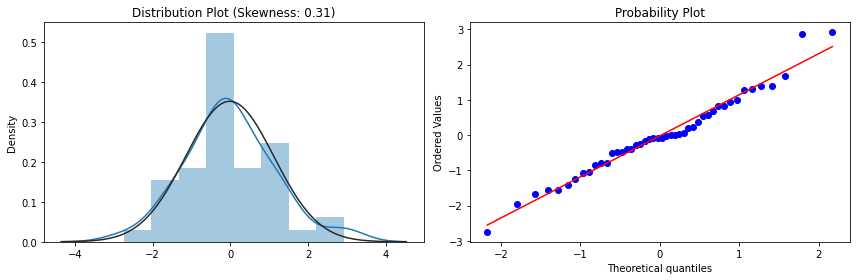

In [29]:
# Normality of Error Terms or Residuals
plt.figure(figsize=(12, 4))

# Distribution Plot
plt.subplot(1, 2, 1)
sns.distplot(residuals, fit=norm)
plt.title(f'Distribution Plot (Skewness: {round(residuals.skew(), 2)})')

# Probability Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, plot=plt)

plt.tight_layout()
plt.show()

The residuals are pretty much normally distributed which satisfies our assumption.

### 5. No Autocorrelation

In [30]:
# Durbin Watson Test
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)

2.2576706467909005

The Durbin Watson statistic close to 2 indicates no autocorrelation among error terms. As the number in our case is considerably close to 2, we can say that the error terms do not have a strong autocorrelation.

### 6. No Perfect Multicollinearity

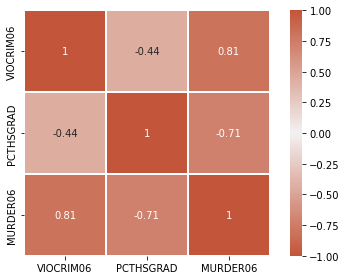


Variance Inflation Factor (VIF):
VIOCRIM06    5.29
PCTHSGRAD    5.29
dtype: float64


In [31]:
# Multicollinearity check
corr_df = df_tfm[['VIOCRIM06', 'PCTHSGRAD', 'MURDER06']].corr()
cmap = sns.diverging_palette(20, 20, as_cmap=True)
sns.heatmap(corr_df, cmap=cmap, vmin=-1, vmax=1, center=0, 
            annot=True, linewidth=0.05, square=True)
plt.tight_layout()
plt.show()

# Variance Inflation Factor (VIF)
X = df_tfm[['VIOCRIM06', 'PCTHSGRAD']]
vif = pd.Series([round(variance_inflation_factor(X.values, i), 2) for i in range(X.shape[1])],
                 index = X.columns)
print(f'\nVariance Inflation Factor (VIF):\n{vif.sort_values(ascending=False)}')

There is no strong correlation (-0.44) between the only two independent variables, and VIFs are also in the acceptable range, which supports our assumption of no perfect multicollinearity.<br>
As all the linear regression assumptions are satisfied, our final model is thus validated.

# Conclusion
We can conclude from the above statistical analysis that the violent crime rate (VIOCRIM06) and percent of the adult population with a high school diploma or equivalent (PCTHSGRAD) in any state most significantly affect its murder rate (MURDER06). The higher the violent crime rate, the higher the murder rate; on the other hand, the higher the percentage of the adult population with a high school diploma or equivalent in the state, the lower the murder rate in that state.<br>